In [490]:
# imports some utilities ...

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [491]:
# constant

EPOCHS = 15
LEARNING_RATE = 0.00001
OUTPUT_SIZE = 3
BATCH_SIZE = 1

In [492]:
df = pd.read_csv('merged_dataset.csv', index_col=[0])

## Let's vizualisate that

In [493]:
df.head()

,Site,lmr_fungicides,lmr_insecticides,lmr_herbicides,111,112,121,122,123,124,...,411,412,421,422,423,511,512,521,522,523
0,B0012,1,0,0,209.227976,6653.099130,17647.006209,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.0,8800.30667,0.0,0.0,0.0,0.0
1,B0017,1,0,0,0.000000,7607.874295,2.319998,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,B0019,0,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,8.187923e+02,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,B0021,1,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,2.574868e+03,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,B0023,0,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.809062e+06,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [494]:
df.shape

(57, 48)

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Site              57 non-null     object 
 1   lmr_fungicides    57 non-null     int64  
 2   lmr_insecticides  57 non-null     int64  
 3   lmr_herbicides    57 non-null     int64  
 4   111               57 non-null     float64
 5   112               57 non-null     float64
 6   121               57 non-null     float64
 7   122               57 non-null     float64
 8   123               57 non-null     float64
 9   124               57 non-null     float64
 10  131               57 non-null     float64
 11  132               57 non-null     float64
 12  133               57 non-null     float64
 13  141               57 non-null     float64
 14  142               57 non-null     float64
 15  211               57 non-null     float64
 16  212               57 non-null     float64
 17 

In [496]:
df.describe(include=['int64', 'float64'])
# df.describe(include=['int64', 'float64']).transpose()

,lmr_fungicides,lmr_insecticides,lmr_herbicides,111,112,121,122,123,124,131,...,411,412,421,422,423,511,512,521,522,523
count,57.000000,57.000000,57.000000,57.000000,5.700000e+01,5.700000e+01,57.000000,57.000000,57.000000,5.700000e+01,...,57.0,5.700000e+01,57.0,57.0,57.000000,57.000000,57.000000,57.0,57.0,57.000000
mean,0.614035,0.140351,0.087719,389.289932,4.384149e+05,1.615709e+05,198.756957,35.163690,27.331065,2.599861e+04,...,0.0,3.179747e+04,0.0,0.0,12.419478,226.420898,25.524836,0.0,0.0,17.269659
std,0.491150,0.350438,0.285401,2049.678099,1.262078e+06,7.086092e+05,479.722186,239.816443,206.345017,1.583911e+05,...,0.0,2.396083e+05,0.0,0.0,66.653643,1225.243534,107.609683,0.0,0.0,105.957421
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.225678e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.029865e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,1.000000,0.000000,0.000000,0.000000,7.328884e+03,5.337917e+02,65.325567,0.000000,0.000000,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,1.000000,1.000000,1.000000,15107.362039,5.206697e+06,4.053755e+06,2509.438121,1802.939005,1557.870715,1.160708e+06,...,0.0,1.809062e+06,0.0,0.0,413.179539,8800.306670,631.183641,0.0,0.0,776.102211


In [497]:
df['lmr_fungicides'].value_counts()

1    35
0    22
Name: lmr_fungicides, dtype: int64

In [498]:
df['lmr_insecticides'].value_counts()

0    49
1     8
Name: lmr_insecticides, dtype: int64

In [499]:
df['lmr_herbicides'].value_counts()

0    52
1     5
Name: lmr_herbicides, dtype: int64

In [500]:
df['111'].value_counts()

0.000000        51
391.077976       1
209.227976       1
3098.057557      1
1967.704980      1
15107.362039     1
1416.095618      1
Name: 111, dtype: int64

In [501]:
df['412'].value_counts()

0.000000e+00    54
1.809062e+06     1
8.187923e+02     1
2.574868e+03     1
Name: 412, dtype: int64

<AxesSubplot:>

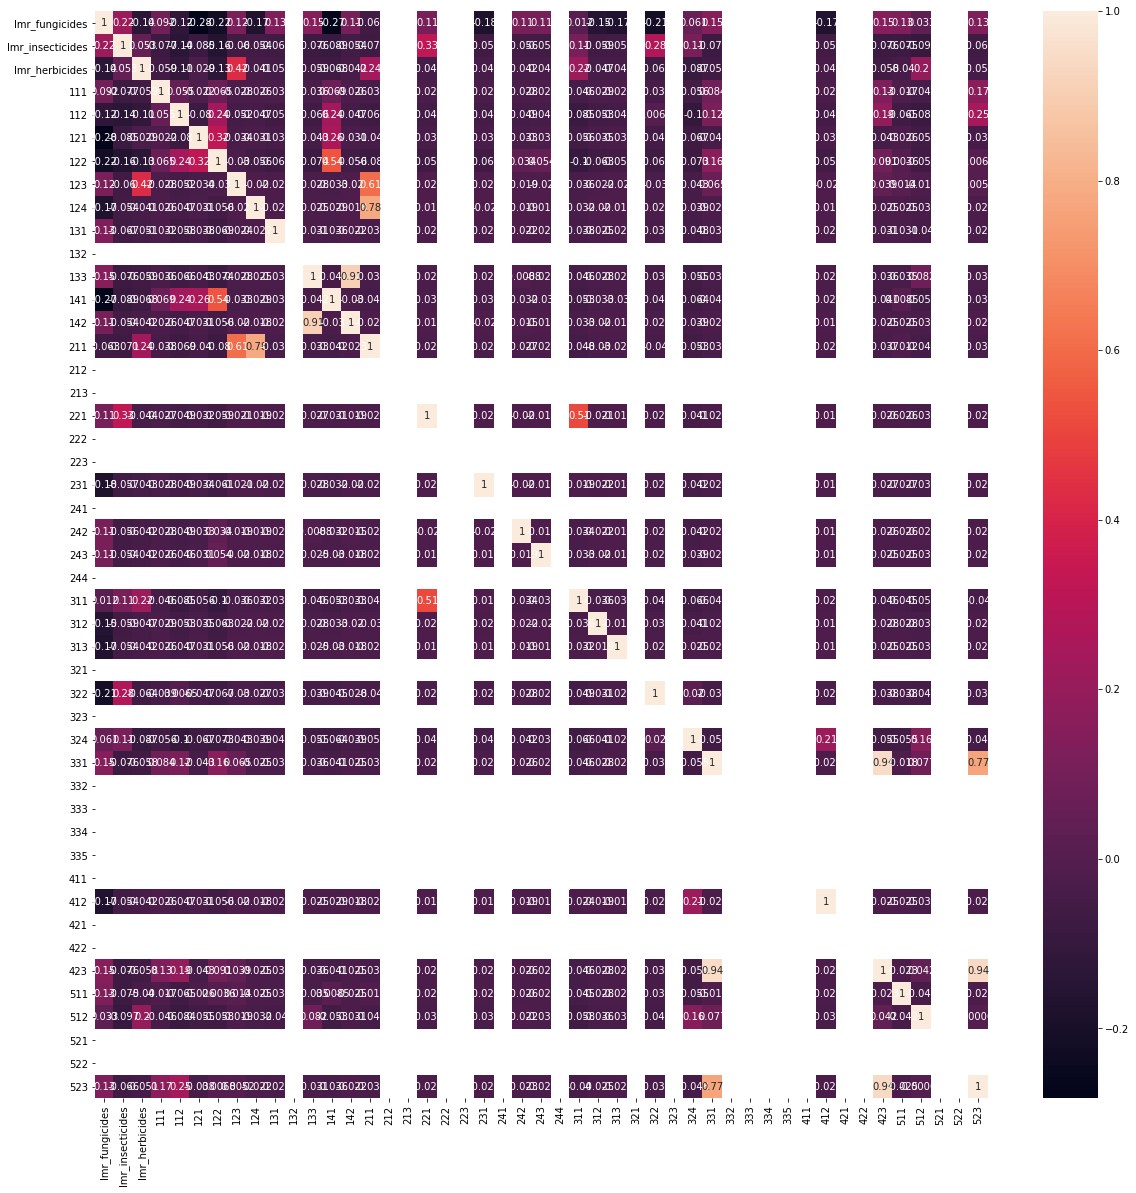

In [502]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,)

<AxesSubplot:>

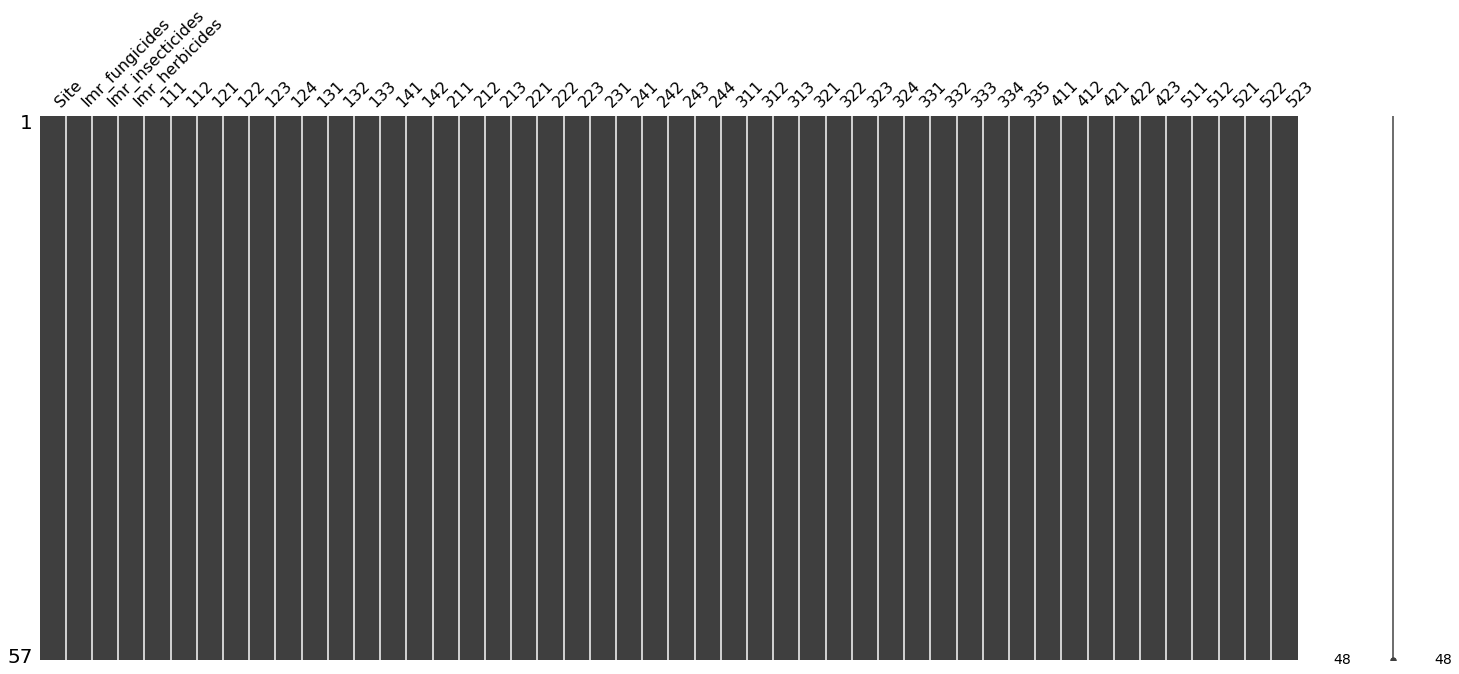

In [503]:
import missingno as msno
%matplotlib inline

msno.matrix(df)

**On peux constater un cruel manque de données et un certains déséquilibre entre les valeurs cibles**( lmr_fungicides, lmr_insecticides, lmr_herbicides )

## Cleaning & spliting the dataset

In [504]:
df = df.drop(['Site'], axis=1)

In [505]:
X = df.drop(['lmr_fungicides', 'lmr_insecticides', 'lmr_herbicides'], axis=1)

In [506]:
X.head()

,111,112,121,122,123,124,131,132,133,141,...,411,412,421,422,423,511,512,521,522,523
0,209.227976,6653.099130,17647.006209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.0,8800.30667,0.0,0.0,0.0,0.0
1,0.000000,7607.874295,2.319998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.187923e+02,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.574868e+03,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.809062e+06,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [507]:
y = df[['lmr_fungicides','lmr_insecticides', 'lmr_herbicides']]
y.head()

,lmr_fungicides,lmr_insecticides,lmr_herbicides
0,1,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [508]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [509]:
from tensorflow.keras import layers, models
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# with tf.device('/GPU:0'):

Num GPUs Available:  1


In [510]:
X_train.shape

(45, 44)

## TRAINING

In [511]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = MinMaxScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train[0]

array([0.00000000e+00, 4.22916199e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.40762270e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.29216948e-02, 0.00000000e+00, 9.82609911e-04,
       0.00000000e+00, 0.00000000e+00, 3.88607254e-04, 4.41912558e-04,
       5.20912819e-01, 0.00000000e+00, 2.60769988e-01, 0.00000000e+00,
       2.80739582e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

### Using XGboost

In [512]:
fung_train = y_train["lmr_fungicides"]
fung_test = y_test["lmr_fungicides"]

In [513]:
import xgboost as xgb
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators=1000, max_depth=2, random_state=42)

xgbc.fit(X_train, fung_train)

[21:40:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\leers\desktop\turing4\beeodiversity\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=12, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [514]:
xgbc.score(X_train, fung_train)

1.0

In [515]:
xgbc.score(X_test, fung_test)

0.6666666666666666

### Using Deep Learning

In [516]:
model = models.Sequential()

model.add(layers.Dense(44, activation='relu', input_shape=(1, 44)))
model.add(layers.Dense(44, activation='relu', input_shape=(1, 44)))

model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 1, 44)             1980      
_________________________________________________________________
dense_76 (Dense)             (None, 1, 44)             1980      
_________________________________________________________________
dense_77 (Dense)             (None, 1, 3)              135       
Total params: 4,095
Trainable params: 4,095
Non-trainable params: 0
_________________________________________________________________


In [517]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [518]:
with tf.device('/GPU:0'):

    history = model.fit(X_train, y_train, epochs=EPOCHS, 
                        validation_data=(X_test, y_test), batch_size=BATCH_SIZE)

Epoch 1/15
45/45 [==============================] - 1s 7ms/step - loss: 0.8663 - accuracy: 0.3963 - val_loss: 1.0841 - val_accuracy: 0.8333
Epoch 2/15
45/45 [==============================] - 0s 4ms/step - loss: 0.8337 - accuracy: 0.9297 - val_loss: 1.2961 - val_accuracy: 1.0000
Epoch 3/15
45/45 [==============================] - 0s 4ms/step - loss: 0.9165 - accuracy: 0.9352 - val_loss: 1.6397 - val_accuracy: 1.0000
Epoch 4/15
45/45 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.9309 - val_loss: 1.9210 - val_accuracy: 1.0000
Epoch 5/15
45/45 [==============================] - 0s 4ms/step - loss: 0.6806 - accuracy: 0.8549 - val_loss: 2.0400 - val_accuracy: 1.0000
Epoch 6/15
45/45 [==============================] - 0s 4ms/step - loss: 0.4135 - accuracy: 0.9300 - val_loss: 2.1192 - val_accuracy: 1.0000
Epoch 7/15
45/45 [==============================] - 0s 4ms/step - loss: 0.5393 - accuracy: 0.8744 - val_loss: 2.2538 - val_accuracy: 0.9167
Epoch 8/15
45/45 [==

1/1 - 0s - loss: 3.2991 - accuracy: 0.9167


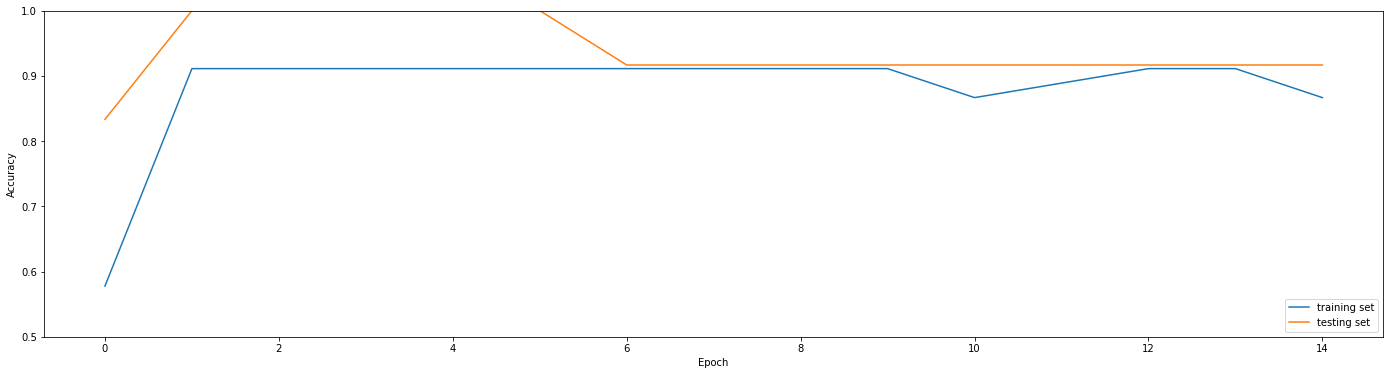

In [519]:
plt.figure(figsize=(24,6))
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [521]:
model.save('biomodel.h5')